<a href="https://colab.research.google.com/github/robinhester/BuildSprint/blob/master/marvelvsdc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

database ends in year 2014. no new appearances since then

In [2]:
dc=pd.read_csv('https://raw.githubusercontent.com/robinhester/data/master/comic-characters/dc-wikia-data.csv')
dc.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [3]:
dc.drop(['urlslug','EYE','HAIR','GSM','page_id'], axis=1, inplace=True)
dc.head()

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,Batman (Bruce Wayne),Secret Identity,Good Characters,Male Characters,Living Characters,3093.0,"1939, May",1939.0
1,Superman (Clark Kent),Secret Identity,Good Characters,Male Characters,Living Characters,2496.0,"1986, October",1986.0
2,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Male Characters,Living Characters,1565.0,"1959, October",1959.0
3,James Gordon (New Earth),Public Identity,Good Characters,Male Characters,Living Characters,1316.0,"1987, February",1987.0
4,Richard Grayson (New Earth),Secret Identity,Good Characters,Male Characters,Living Characters,1237.0,"1940, April",1940.0


In [4]:
marvel=pd.read_csv('https://raw.githubusercontent.com/robinhester/data/master/comic-characters/marvel-wikia-data.csv')
marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [5]:
marvel.drop(['urlslug','EYE','HAIR','GSM','page_id'], axis=1, inplace=True)
marvel.head()

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Male Characters,Living Characters,2258.0,Nov-50,1950.0


Here's my question. Who has the most appearance in marvel and dc comics/averaged by how long they have been in the comics. 

In [6]:
dc.dtypes

name                 object
ID                   object
ALIGN                object
SEX                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [7]:
marvel.dtypes

name                 object
ID                   object
ALIGN                object
SEX                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [8]:
marvel.describe()

,APPEARANCES,Year
count,15280.000000,15561.000000
mean,17.033377,1984.951803
std,96.372959,19.663571
min,1.000000,1939.000000
25%,1.000000,1974.000000
50%,3.000000,1990.000000
75%,8.000000,2000.000000
max,4043.000000,2013.000000


In [9]:
dc.describe()

,APPEARANCES,YEAR
count,6541.000000,6827.000000
mean,23.625134,1989.766662
std,87.378509,16.824194
min,1.000000,1935.000000
25%,2.000000,1983.000000
50%,6.000000,1992.000000
75%,15.000000,2003.000000
max,3093.000000,2013.000000


how do I average the years with the appearances. Possibly write a function? for a new column that takes the year they appeared and subtracts that from 2014, which gives me a total amount of years in the comics?

graph top marvel and top dc, then graph top marvel and dc. 


then maybe we can do some t tests to find out if the amount of appearances is related to the years they have been in the comics. if we do not have a year for the character, then we need to delete that row. 

In [0]:
#creating a function to find the average amount of appearances 
def average(x,y):
  years=2014 - x 
  return y/years

In [11]:
years_sample=np.array([1984,1962,1931])
appearances_sample=np.array([3000,24,1371])
sample=[]
sample=average(years_sample, appearances_sample)
sample

array([100.        ,   0.46153846,  16.51807229])

In [12]:
dc['average_appearances_per_year']=average(dc.YEAR,dc.APPEARANCES)
dc.head()

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,average_appearances_per_year
0,Batman (Bruce Wayne),Secret Identity,Good Characters,Male Characters,Living Characters,3093.0,"1939, May",1939.0,41.240000
1,Superman (Clark Kent),Secret Identity,Good Characters,Male Characters,Living Characters,2496.0,"1986, October",1986.0,89.142857
2,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Male Characters,Living Characters,1565.0,"1959, October",1959.0,28.454545
3,James Gordon (New Earth),Public Identity,Good Characters,Male Characters,Living Characters,1316.0,"1987, February",1987.0,48.740741
4,Richard Grayson (New Earth),Secret Identity,Good Characters,Male Characters,Living Characters,1237.0,"1940, April",1940.0,16.716216


In [13]:
marvel['average_appearances_per_year']=average(marvel.Year,marvel.APPEARANCES)
marvel.head()

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,average_appearances_per_year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Male Characters,Living Characters,4043.0,Aug-62,1962.0,77.750000
1,Captain America (Steven Rogers),Public Identity,Good Characters,Male Characters,Living Characters,3360.0,Mar-41,1941.0,46.027397
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Male Characters,Living Characters,3061.0,Oct-74,1974.0,76.525000
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Male Characters,Living Characters,2961.0,Mar-63,1963.0,58.058824
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Male Characters,Living Characters,2258.0,Nov-50,1950.0,35.281250


In [14]:
female_dc=dc[dc.SEX=='Female Characters']
female_dc.head()

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,average_appearances_per_year
5,Wonder Woman (Diana Prince),Public Identity,Good Characters,Female Characters,Living Characters,1231.0,"1941, December",1941.0,16.863014
8,Dinah Laurel Lance (New Earth),Public Identity,Good Characters,Female Characters,Living Characters,1075.0,"1969, November",1969.0,23.888889
10,GenderTest,Secret Identity,Good Characters,Female Characters,Living Characters,1028.0,"1956, October",1956.0,17.724138
12,Barbara Gordon (New Earth),Secret Identity,Good Characters,Female Characters,Living Characters,951.0,"1967, January",1967.0,20.234043
14,Lois Lane (New Earth),Public Identity,Good Characters,Female Characters,Living Characters,934.0,"1938, June",1938.0,12.289474


In [15]:
female_marvel=marvel[marvel.SEX=='Female Characters']
female_marvel.head()

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,average_appearances_per_year
11,Susan Storm (Earth-616),Public Identity,Good Characters,Female Characters,Living Characters,1713.0,Nov-61,1961.0,32.320755
13,Ororo Munroe (Earth-616),Public Identity,Good Characters,Female Characters,Living Characters,1512.0,May-75,1975.0,38.769231
17,Mary Jane Watson (Earth-616),No Dual Identity,Good Characters,Female Characters,Living Characters,1304.0,Jun-65,1965.0,26.612245
24,Wanda Maximoff (Earth-616),Public Identity,Good Characters,Female Characters,Living Characters,1161.0,Mar-64,1964.0,23.220000
26,Janet van Dyne (Earth-616),Public Identity,Good Characters,Female Characters,Living Characters,1120.0,Jun-63,1963.0,21.960784


In [16]:
villians_dc=dc[dc.ALIGN=='Bad Characters']
villians_dc.head()

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,average_appearances_per_year
19,Alexander Luthor (New Earth),Public Identity,Bad Characters,Male Characters,Living Characters,677.0,"1986, October",1986.0,24.178571
30,Joker (New Earth),Secret Identity,Bad Characters,Male Characters,Living Characters,517.0,"1940, June",1940.0,6.986486
44,Uxas (New Earth),Public Identity,Bad Characters,Male Characters,Deceased Characters,388.0,"1970, December",1970.0,8.818182
66,Harvey Dent (New Earth),Public Identity,Bad Characters,Male Characters,Living Characters,306.0,"1942, August",1942.0,4.250000
107,Jonathan Crane (New Earth),Public Identity,Bad Characters,Male Characters,Living Characters,222.0,"1941, September",1941.0,3.041096


In [17]:
villians_marvel=marvel[marvel.ALIGN=='Bad Characters']
villians_marvel.head()

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,average_appearances_per_year
43,Victor von Doom (Earth-616),Public Identity,Bad Characters,Male Characters,Living Characters,721.0,Jul-62,1962.0,13.865385
47,Norman Osborn (Earth-616),Public Identity,Bad Characters,Male Characters,Living Characters,692.0,Jul-64,1964.0,13.840000
69,Wilson Fisk (Earth-616),Public Identity,Bad Characters,Male Characters,Living Characters,503.0,Jul-67,1967.0,10.702128
92,Sabretooth (Victor Creed),Secret Identity,Bad Characters,Male Characters,Living Characters,382.0,Aug-77,1977.0,10.324324
94,Johann Shmidt (Earth-616),Public Identity,Bad Characters,Male Characters,Deceased Characters,376.0,Aug-41,1941.0,5.150685


In [18]:
dc.sort_values(by=['average_appearances_per_year'], inplace=True, ascending=False)
dc.head()

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,average_appearances_per_year
1,Superman (Clark Kent),Secret Identity,Good Characters,Male Characters,Living Characters,2496.0,"1986, October",1986.0,89.142857
3,James Gordon (New Earth),Public Identity,Good Characters,Male Characters,Living Characters,1316.0,"1987, February",1987.0,48.740741
7,Timothy Drake (New Earth),Secret Identity,Good Characters,Male Characters,Living Characters,1095.0,"1989, August",1989.0,43.800000
0,Batman (Bruce Wayne),Secret Identity,Good Characters,Male Characters,Living Characters,3093.0,"1939, May",1939.0,41.240000
17,Kyle Rayner (New Earth),Secret Identity,Good Characters,Male Characters,Living Characters,716.0,"1994, January",1994.0,35.800000


In [19]:
marvel.sort_values(by=['average_appearances_per_year'], inplace=True, ascending=False)
marvel.head()

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,average_appearances_per_year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Male Characters,Living Characters,4043.0,Aug-62,1962.0,77.750000
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Male Characters,Living Characters,3061.0,Oct-74,1974.0,76.525000
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Male Characters,Living Characters,2961.0,Mar-63,1963.0,58.058824
707,Eva Bell (Earth-616),Public Identity,Good Characters,Female Characters,Living Characters,53.0,Jan-13,2013.0,53.000000
764,Christopher Muse (Earth-616),Public Identity,Good Characters,Male Characters,Living Characters,49.0,Jan-13,2013.0,49.000000


In [20]:
female_dc.sort_values(by=['average_appearances_per_year'], inplace=True, ascending=False)
female_dc.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,average_appearances_per_year
71,Kara Zor-El (New Earth),Secret Identity,Good Characters,Female Characters,Living Characters,297.0,"2004, May",2004.0,29.700000
8,Dinah Laurel Lance (New Earth),Public Identity,Good Characters,Female Characters,Living Characters,1075.0,"1969, November",1969.0,23.888889
38,Cassandra Sandsmark (New Earth),Public Identity,Good Characters,Female Characters,Living Characters,423.0,"1996, January",1996.0,23.500000
67,Courtney Whitmore (New Earth),Secret Identity,Good Characters,Female Characters,Living Characters,305.0,"1999, July",1999.0,20.333333
12,Barbara Gordon (New Earth),Secret Identity,Good Characters,Female Characters,Living Characters,951.0,"1967, January",1967.0,20.234043


In [21]:
female_marvel.sort_values(by=['average_appearances_per_year'], inplace=True, ascending=False)
female_marvel.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,average_appearances_per_year
707,Eva Bell (Earth-616),Public Identity,Good Characters,Female Characters,Living Characters,53.0,Jan-13,2013.0,53.000000
13,Ororo Munroe (Earth-616),Public Identity,Good Characters,Female Characters,Living Characters,1512.0,May-75,1975.0,38.769231
115,Maria Hill (Earth-616),No Dual Identity,Good Characters,Female Characters,Living Characters,325.0,Apr-05,2005.0,36.111111
206,Hope Summers (Earth-616),Secret Identity,Good Characters,Female Characters,Living Characters,200.0,Jan-08,2008.0,33.333333
11,Susan Storm (Earth-616),Public Identity,Good Characters,Female Characters,Living Characters,1713.0,Nov-61,1961.0,32.320755


In [22]:
females= female_dc.copy()
females.head()

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,average_appearances_per_year
71,Kara Zor-El (New Earth),Secret Identity,Good Characters,Female Characters,Living Characters,297.0,"2004, May",2004.0,29.700000
8,Dinah Laurel Lance (New Earth),Public Identity,Good Characters,Female Characters,Living Characters,1075.0,"1969, November",1969.0,23.888889
38,Cassandra Sandsmark (New Earth),Public Identity,Good Characters,Female Characters,Living Characters,423.0,"1996, January",1996.0,23.500000
67,Courtney Whitmore (New Earth),Secret Identity,Good Characters,Female Characters,Living Characters,305.0,"1999, July",1999.0,20.333333
12,Barbara Gordon (New Earth),Secret Identity,Good Characters,Female Characters,Living Characters,951.0,"1967, January",1967.0,20.234043


In [23]:
females=females.append(female_marvel, sort=True)
females.head()

,ALIGN,ALIVE,APPEARANCES,FIRST APPEARANCE,ID,SEX,YEAR,Year,average_appearances_per_year,name
71,Good Characters,Living Characters,297.0,"2004, May",Secret Identity,Female Characters,2004.0,NaN,29.700000,Kara Zor-El (New Earth)
8,Good Characters,Living Characters,1075.0,"1969, November",Public Identity,Female Characters,1969.0,NaN,23.888889,Dinah Laurel Lance (New Earth)
38,Good Characters,Living Characters,423.0,"1996, January",Public Identity,Female Characters,1996.0,NaN,23.500000,Cassandra Sandsmark (New Earth)
67,Good Characters,Living Characters,305.0,"1999, July",Secret Identity,Female Characters,1999.0,NaN,20.333333,Courtney Whitmore (New Earth)
12,Good Characters,Living Characters,951.0,"1967, January",Secret Identity,Female Characters,1967.0,NaN,20.234043,Barbara Gordon (New Earth)


In [24]:
females.sort_values(by=['average_appearances_per_year'], inplace=True, ascending=False)
females.head()

,ALIGN,ALIVE,APPEARANCES,FIRST APPEARANCE,ID,SEX,YEAR,Year,average_appearances_per_year,name
707,Good Characters,Living Characters,53.0,Jan-13,Public Identity,Female Characters,NaN,2013.0,53.000000,Eva Bell (Earth-616)
13,Good Characters,Living Characters,1512.0,May-75,Public Identity,Female Characters,NaN,1975.0,38.769231,Ororo Munroe (Earth-616)
115,Good Characters,Living Characters,325.0,Apr-05,No Dual Identity,Female Characters,NaN,2005.0,36.111111,Maria Hill (Earth-616)
206,Good Characters,Living Characters,200.0,Jan-08,Secret Identity,Female Characters,NaN,2008.0,33.333333,Hope Summers (Earth-616)
11,Good Characters,Living Characters,1713.0,Nov-61,Public Identity,Female Characters,NaN,1961.0,32.320755,Susan Storm (Earth-616)


In [0]:
females_sorted=females.head(15)

In [26]:
villians_marvel.sort_values(by=['average_appearances_per_year'], inplace=True, ascending=False)
villians_marvel.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,average_appearances_per_year
217,Akihiro (Earth-616),Secret Identity,Bad Characters,Male Characters,Living Characters,189.0,Oct-06,2006.0,23.625000
265,Veranke (Earth-616),No Dual Identity,Bad Characters,Female Characters,Deceased Characters,156.0,Jan-05,2005.0,17.333333
2146,Charles Xavier (Legion Personality) (Earth-616),Secret Identity,Bad Characters,Male Characters,Living Characters,17.0,Jan-13,2013.0,17.000000
2281,Corvus Glaive (Earth-616),No Dual Identity,Bad Characters,Male Characters,Living Characters,16.0,May-13,2013.0,16.000000
2548,Recorder 451 (Earth-616),Public Identity,Bad Characters,Agender Characters,Deceased Characters,14.0,Apr-13,2013.0,14.000000


In [27]:
villians_dc.sort_values(by=['average_appearances_per_year'], inplace=True, ascending=False)
villians_dc.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,average_appearances_per_year
19,Alexander Luthor (New Earth),Public Identity,Bad Characters,Male Characters,Living Characters,677.0,"1986, October",1986.0,24.178571
183,Harleen Quinzel (New Earth),Public Identity,Bad Characters,Female Characters,Living Characters,153.0,"1999, October",1999.0,10.200000
44,Uxas (New Earth),Public Identity,Bad Characters,Male Characters,Deceased Characters,388.0,"1970, December",1970.0,8.818182
591,Scar (New Earth),Secret Identity,Bad Characters,Female Characters,Deceased Characters,49.0,"2008, January",2008.0,8.166667
422,"Peter Merkel, Jr. (New Earth)",Secret Identity,Bad Characters,Male Characters,Living Characters,72.0,"2005, July",2005.0,8.000000


In [0]:
villians=villians_dc.copy()

In [0]:
villians=villians.append(villians_marvel, sort=True)

In [30]:
villians.sort_values(by=['average_appearances_per_year'], inplace=True, ascending=False)
villians.head(20)

,ALIGN,ALIVE,APPEARANCES,FIRST APPEARANCE,ID,SEX,YEAR,Year,average_appearances_per_year,name
19,Bad Characters,Living Characters,677.0,"1986, October",Public Identity,Male Characters,1986.0,NaN,24.178571,Alexander Luthor (New Earth)
217,Bad Characters,Living Characters,189.0,Oct-06,Secret Identity,Male Characters,NaN,2006.0,23.625000,Akihiro (Earth-616)
265,Bad Characters,Deceased Characters,156.0,Jan-05,No Dual Identity,Female Characters,NaN,2005.0,17.333333,Veranke (Earth-616)
2146,Bad Characters,Living Characters,17.0,Jan-13,Secret Identity,Male Characters,NaN,2013.0,17.000000,Charles Xavier (Legion Personality) (Earth-616)
2281,Bad Characters,Living Characters,16.0,May-13,No Dual Identity,Male Characters,NaN,2013.0,16.000000,Corvus Glaive (Earth-616)
2548,Bad Characters,Deceased Characters,14.0,Apr-13,Public Identity,Agender Characters,NaN,2013.0,14.000000,Recorder 451 (Earth-616)
43,Bad Characters,Living Characters,721.0,Jul-62,Public Identity,Male Characters,NaN,1962.0,13.865385,Victor von Doom (Earth-616)
47,Bad Characters,Living Characters,692.0,Jul-64,Public Identity,Male Characters,NaN,1964.0,13.840000,Norman Osborn (Earth-616)
2908,Bad Characters,Living Characters,12.0,Jan-13,Secret Identity,Male Characters,NaN,2013.0,12.000000,Mudbug (Earth-616)
2906,Bad Characters,Deceased Characters,12.0,Jan-13,Public Identity,Male Characters,NaN,2013.0,12.000000,Luca Aldine (Earth-616)


In [0]:
villians=villians.head(15)

In [32]:
marvel.head()

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,average_appearances_per_year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Male Characters,Living Characters,4043.0,Aug-62,1962.0,77.750000
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Male Characters,Living Characters,3061.0,Oct-74,1974.0,76.525000
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Male Characters,Living Characters,2961.0,Mar-63,1963.0,58.058824
707,Eva Bell (Earth-616),Public Identity,Good Characters,Female Characters,Living Characters,53.0,Jan-13,2013.0,53.000000
764,Christopher Muse (Earth-616),Public Identity,Good Characters,Male Characters,Living Characters,49.0,Jan-13,2013.0,49.000000


In [33]:
top_5_marvel=marvel.head(5)
top_5_marvel

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,average_appearances_per_year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Male Characters,Living Characters,4043.0,Aug-62,1962.0,77.750000
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Male Characters,Living Characters,3061.0,Oct-74,1974.0,76.525000
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Male Characters,Living Characters,2961.0,Mar-63,1963.0,58.058824
707,Eva Bell (Earth-616),Public Identity,Good Characters,Female Characters,Living Characters,53.0,Jan-13,2013.0,53.000000
764,Christopher Muse (Earth-616),Public Identity,Good Characters,Male Characters,Living Characters,49.0,Jan-13,2013.0,49.000000


In [34]:
top_5_dc=dc.head(5)
top_5_dc

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,average_appearances_per_year
1,Superman (Clark Kent),Secret Identity,Good Characters,Male Characters,Living Characters,2496.0,"1986, October",1986.0,89.142857
3,James Gordon (New Earth),Public Identity,Good Characters,Male Characters,Living Characters,1316.0,"1987, February",1987.0,48.740741
7,Timothy Drake (New Earth),Secret Identity,Good Characters,Male Characters,Living Characters,1095.0,"1989, August",1989.0,43.800000
0,Batman (Bruce Wayne),Secret Identity,Good Characters,Male Characters,Living Characters,3093.0,"1939, May",1939.0,41.240000
17,Kyle Rayner (New Earth),Secret Identity,Good Characters,Male Characters,Living Characters,716.0,"1994, January",1994.0,35.800000


In [0]:
import matplotlib.font_manager
csfont = {'fontname':'Arial Narrow'}
dsfont={'fontname':'Times New Roman'}

In [0]:
top_10=top_5_dc.copy()

In [37]:
top_10=top_10.append(top_5_marvel)
top_10

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,ALIGN,ALIVE,APPEARANCES,FIRST APPEARANCE,ID,SEX,YEAR,Year,average_appearances_per_year,name
1,Good Characters,Living Characters,2496.0,"1986, October",Secret Identity,Male Characters,1986.0,NaN,89.142857,Superman (Clark Kent)
3,Good Characters,Living Characters,1316.0,"1987, February",Public Identity,Male Characters,1987.0,NaN,48.740741,James Gordon (New Earth)
7,Good Characters,Living Characters,1095.0,"1989, August",Secret Identity,Male Characters,1989.0,NaN,43.800000,Timothy Drake (New Earth)
0,Good Characters,Living Characters,3093.0,"1939, May",Secret Identity,Male Characters,1939.0,NaN,41.240000,Batman (Bruce Wayne)
17,Good Characters,Living Characters,716.0,"1994, January",Secret Identity,Male Characters,1994.0,NaN,35.800000,Kyle Rayner (New Earth)
0,Good Characters,Living Characters,4043.0,Aug-62,Secret Identity,Male Characters,NaN,1962.0,77.750000,Spider-Man (Peter Parker)
2,Neutral Characters,Living Characters,3061.0,Oct-74,Public Identity,Male Characters,NaN,1974.0,76.525000,"Wolverine (James \""Logan\"" Howlett)"
3,Good Characters,Living Characters,2961.0,Mar-63,Public Identity,Male Characters,NaN,1963.0,58.058824,"Iron Man (Anthony \""Tony\"" Stark)"
707,Good Characters,Living Characters,53.0,Jan-13,Public Identity,Female Characters,NaN,2013.0,53.000000,Eva Bell (Earth-616)
764,Good Characters,Living Characters,49.0,Jan-13,Public Identity,Male Characters,NaN,2013.0,49.000000,Christopher Muse (Earth-616)


In [38]:
top_10.sort_values(by=['average_appearances_per_year'], inplace=True,ascending=False)
top_10

,ALIGN,ALIVE,APPEARANCES,FIRST APPEARANCE,ID,SEX,YEAR,Year,average_appearances_per_year,name
1,Good Characters,Living Characters,2496.0,"1986, October",Secret Identity,Male Characters,1986.0,NaN,89.142857,Superman (Clark Kent)
0,Good Characters,Living Characters,4043.0,Aug-62,Secret Identity,Male Characters,NaN,1962.0,77.750000,Spider-Man (Peter Parker)
2,Neutral Characters,Living Characters,3061.0,Oct-74,Public Identity,Male Characters,NaN,1974.0,76.525000,"Wolverine (James \""Logan\"" Howlett)"
3,Good Characters,Living Characters,2961.0,Mar-63,Public Identity,Male Characters,NaN,1963.0,58.058824,"Iron Man (Anthony \""Tony\"" Stark)"
707,Good Characters,Living Characters,53.0,Jan-13,Public Identity,Female Characters,NaN,2013.0,53.000000,Eva Bell (Earth-616)
764,Good Characters,Living Characters,49.0,Jan-13,Public Identity,Male Characters,NaN,2013.0,49.000000,Christopher Muse (Earth-616)
3,Good Characters,Living Characters,1316.0,"1987, February",Public Identity,Male Characters,1987.0,NaN,48.740741,James Gordon (New Earth)
7,Good Characters,Living Characters,1095.0,"1989, August",Secret Identity,Male Characters,1989.0,NaN,43.800000,Timothy Drake (New Earth)
0,Good Characters,Living Characters,3093.0,"1939, May",Secret Identity,Male Characters,1939.0,NaN,41.240000,Batman (Bruce Wayne)
17,Good Characters,Living Characters,716.0,"1994, January",Secret Identity,Male Characters,1994.0,NaN,35.800000,Kyle Rayner (New Earth)


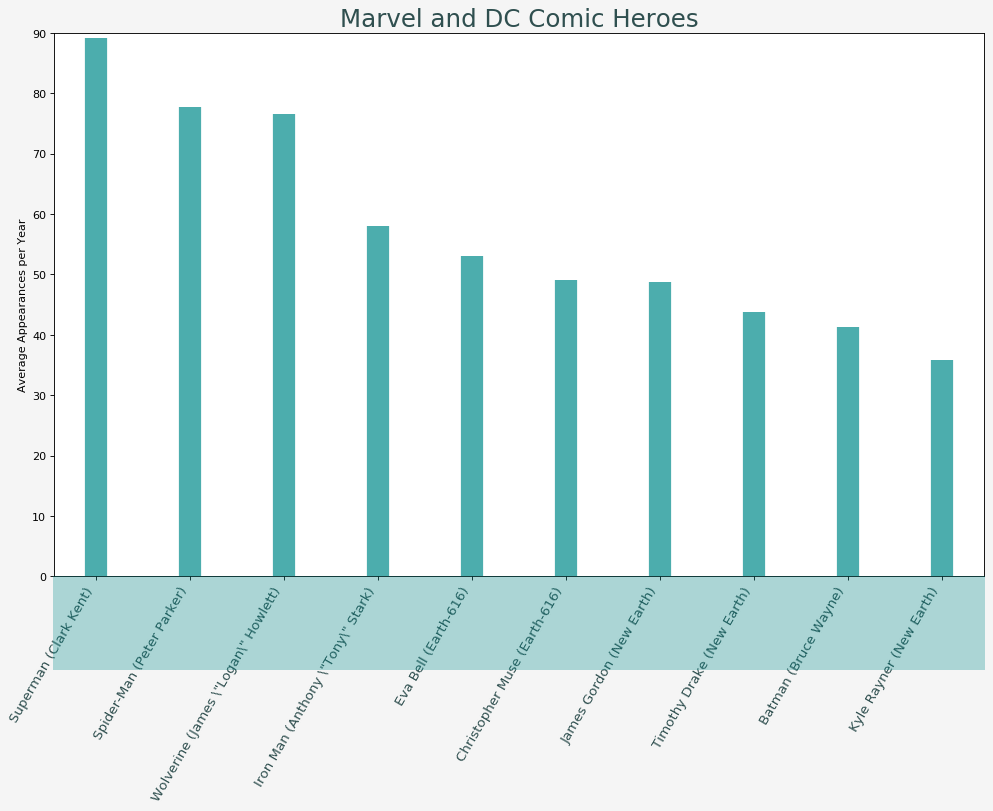

In [51]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(15,9), facecolor='whitesmoke', dpi= 80)
ax.vlines(x=top_10.name, ymin=0, ymax=top_10.average_appearances_per_year, color='darkcyan', alpha=0.7, linewidth=20)




# Title, Label, Ticks and Ylim
ax.set_title('Marvel and DC Comic Heroes', fontdict={'size':22}, color='darkslategray')
ax.set(ylabel='Average Appearances per Year', ylim=(0, 90))

plt.xticks(top_10.name, rotation=60, horizontalalignment='right', fontsize=12, color='darkslategray')

# Add patches to color the X axis labels

p2 = patches.Rectangle((.124, -0.005), width=.777, height=.13, alpha=.3, facecolor='darkcyan', transform=fig.transFigure)

fig.add_artist(p2)


plt.show()

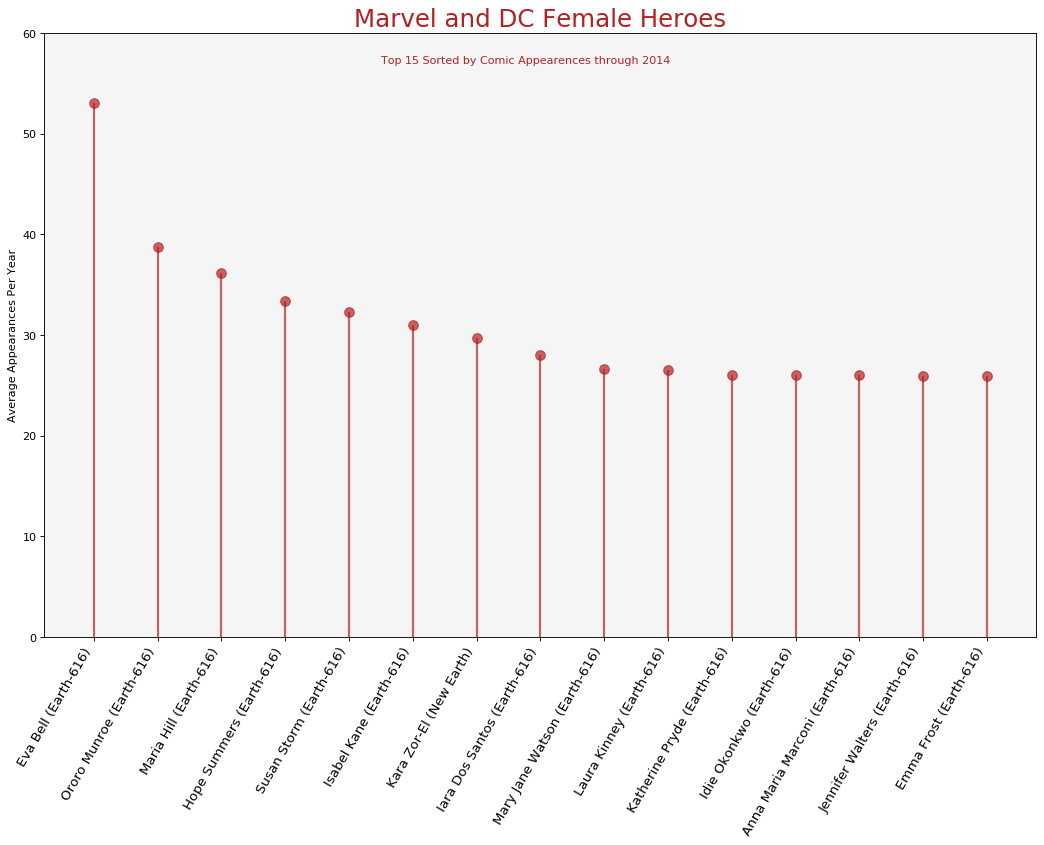

In [40]:
# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=females_sorted.name, ymin=0, ymax=females_sorted.average_appearances_per_year, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=females_sorted.name, y=females_sorted.average_appearances_per_year, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Marvel and DC Female Heroes', fontdict={'size':22}, color='firebrick')
ax.text(4.5,57,s='Top 15 Sorted by Comic Appearences through 2014', color='firebrick')
ax.set_ylabel('Average Appearances Per Year')
ax.set_xticks(females_sorted.name)
ax.set_xticklabels(females_sorted.name, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 60)


ax.set_facecolor('whitesmoke')

plt.show()

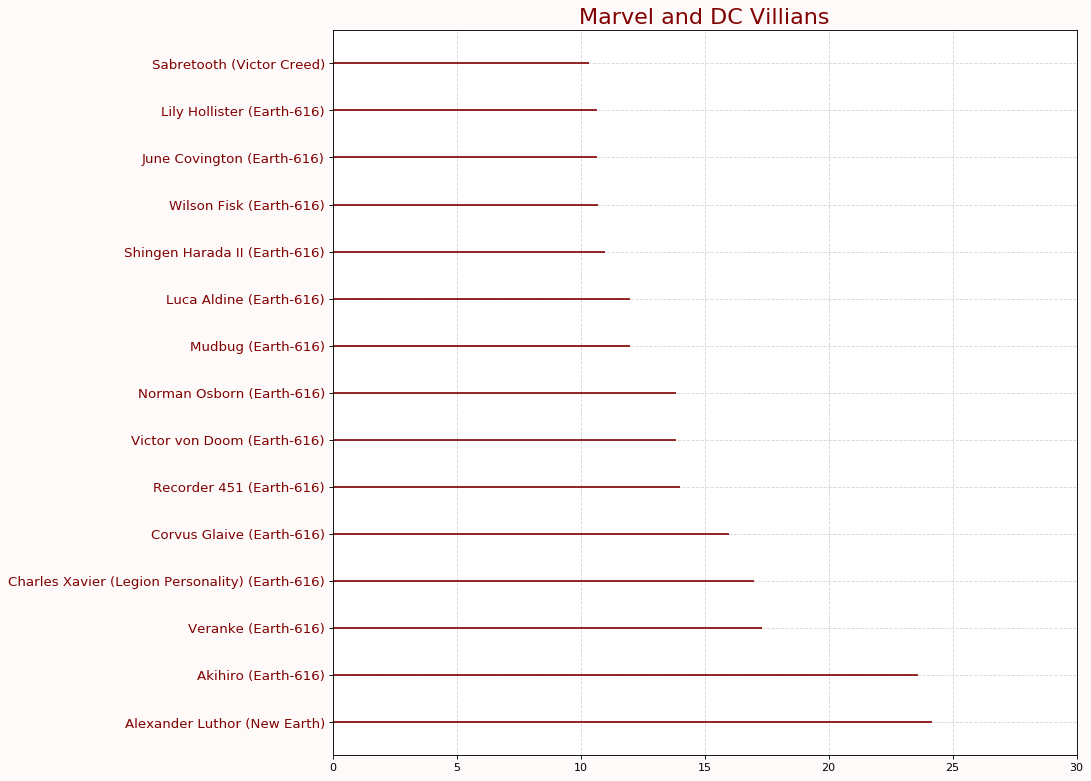

In [52]:
# Draw plot
plt.figure(figsize=(12,12), dpi= 80, facecolor='snow')
plt.hlines(y=villians.name, xmin=0, xmax=villians.average_appearances_per_year,color='maroon')


# Decorations    
plt.yticks(villians.name, fontsize=12, color='maroon')
plt.title('Marvel and DC Villians', fontdict={'size':20}, color='maroon')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(0, 30)
plt.show()

In [0]:
stat_marvel_dc=dc.copy()

In [0]:
stat_marvel_dc=stat_marvel_dc.append(marvel, sort=False)

In [44]:
stat_marvel_dc.head()

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,average_appearances_per_year,Year
1,Superman (Clark Kent),Secret Identity,Good Characters,Male Characters,Living Characters,2496.0,"1986, October",1986.0,89.142857,NaN
3,James Gordon (New Earth),Public Identity,Good Characters,Male Characters,Living Characters,1316.0,"1987, February",1987.0,48.740741,NaN
7,Timothy Drake (New Earth),Secret Identity,Good Characters,Male Characters,Living Characters,1095.0,"1989, August",1989.0,43.800000,NaN
0,Batman (Bruce Wayne),Secret Identity,Good Characters,Male Characters,Living Characters,3093.0,"1939, May",1939.0,41.240000,NaN
17,Kyle Rayner (New Earth),Secret Identity,Good Characters,Male Characters,Living Characters,716.0,"1994, January",1994.0,35.800000,NaN


In [45]:
stat_marvel_dc = stat_marvel_dc.replace({ 'Good Characters':1, 'Bad Characters':2, 'Neutral Characters':0,'Reformed Criminals':3,
                                         'Male Characters':1,'Female Characters':2,'Genderless Characters':0,'Transgender Characters':3,
                                         'Agender Characters':4,'Genderfluid Characters':5})
stat_marvel_dc.head()

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,average_appearances_per_year,Year
1,Superman (Clark Kent),Secret Identity,1.0,1.0,Living Characters,2496.0,"1986, October",1986.0,89.142857,NaN
3,James Gordon (New Earth),Public Identity,1.0,1.0,Living Characters,1316.0,"1987, February",1987.0,48.740741,NaN
7,Timothy Drake (New Earth),Secret Identity,1.0,1.0,Living Characters,1095.0,"1989, August",1989.0,43.800000,NaN
0,Batman (Bruce Wayne),Secret Identity,1.0,1.0,Living Characters,3093.0,"1939, May",1939.0,41.240000,NaN
17,Kyle Rayner (New Earth),Secret Identity,1.0,1.0,Living Characters,716.0,"1994, January",1994.0,35.800000,NaN


In [0]:
def stats(x,y):
  return stats.ttest_ind(x, y, nan_policy='omit')

In [47]:
stat_marvel_dc.dtypes

name                             object
ID                               object
ALIGN                           float64
SEX                             float64
ALIVE                            object
APPEARANCES                     float64
FIRST APPEARANCE                 object
YEAR                            float64
average_appearances_per_year    float64
Year                            float64
dtype: object

In [54]:
stat_marvel_dc.ALIGN.astype(float)

1        1.0
3        1.0
7        1.0
0        1.0
17       1.0
        ... 
16371    2.0
16372    1.0
16373    2.0
16374    0.0
16375    2.0
Name: ALIGN, Length: 23272, dtype: float64

In [53]:
stat_marvel_dc.SEX.astype(float)

1        1.0
3        1.0
7        1.0
0        1.0
17       1.0
        ... 
16371    1.0
16372    1.0
16373    1.0
16374    1.0
16375    NaN
Name: SEX, Length: 23272, dtype: float64

In [55]:
stats.ttest_ind(stat_marvel_dc.ALIGN,stat_marvel_dc.APPEARANCES, nan_policy='omit')

AttributeError: ignored

In [0]:
stats.ttest_ind(stat_marvel_dc.APPEARANCES, stat_marvel_dc.SEX, nan_policy='omit')

In [0]:
np.ma.corrcoef(stat_marvel_dc.APPEARANCES, stat_marvel_dc.SEX)

In [0]:
np.cov(stat_marvel_dc.APPEARANCES,stat_marvel_dc.SEX)

In [0]:
stat_marvel_dc.cov()

In [0]:
stat_marvel_dc.corr()

In [0]:
stat_marvel_dc.describe()

In [62]:
poll=pd.read_csv('https://raw.githubusercontent.com/robinhester/BuildSprint/master/Untitled%20spreadsheet%20-%20Sheet1.csv')
poll.head()

,Villian,Age,Sex,Region
0,Poison Ivy,34.0,M,Midwest
1,Joker,34.0,M,Midwest
2,Riddler,34.0,M,Midwest
3,Catwoman,34.0,M,Midwest
4,Penguin,34.0,M,Midwest


In [67]:
poll_counts=poll.Villian.value_counts(sort=True, ascending=False)
poll_counts.head(10)

Joker           125
Darkseid         74
Lex Luther       73
Deathstroke      46
Harley Quinn     46
Ra's Al Ghul     44
Riddler          44
Brainiac         41
Bane             39
Zod              36
Name: Villian, dtype: int64

In [68]:
poll_counts.dtype

dtype('int64')

In [78]:
top_10_dc_villians=villians_dc.head(10)
top_10_dc_villians.head(10)

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,average_appearances_per_year
19,Alexander Luthor (New Earth),Public Identity,Bad Characters,Male Characters,Living Characters,677.0,"1986, October",1986.0,24.178571
183,Harleen Quinzel (New Earth),Public Identity,Bad Characters,Female Characters,Living Characters,153.0,"1999, October",1999.0,10.200000
44,Uxas (New Earth),Public Identity,Bad Characters,Male Characters,Deceased Characters,388.0,"1970, December",1970.0,8.818182
591,Scar (New Earth),Secret Identity,Bad Characters,Female Characters,Deceased Characters,49.0,"2008, January",2008.0,8.166667
422,"Peter Merkel, Jr. (New Earth)",Secret Identity,Bad Characters,Male Characters,Living Characters,72.0,"2005, July",2005.0,8.000000
350,Thomas Elliot (New Earth),Secret Identity,Bad Characters,Male Characters,Living Characters,84.0,"2003, January",2003.0,7.636364
178,Bane (New Earth),Secret Identity,Bad Characters,Male Characters,Living Characters,157.0,"1993, January",1993.0,7.476190
461,Scandal Savage (New Earth),Secret Identity,Bad Characters,Female Characters,Living Characters,65.0,"2005, July",2005.0,7.222222
654,Zilius Zox (New Earth),Public Identity,Bad Characters,Male Characters,Deceased Characters,43.0,"2008, December",2008.0,7.166667
799,Jeannette (New Earth),Secret Identity,Bad Characters,Female Characters,Living Characters,35.0,"2009, January",2009.0,7.000000


In [82]:
top_10_dc_villians.set_index(['name'],inplace=True)
top_10_dc_villians.head()

,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,average_appearances_per_year
name,,,,,,,,
Alexander Luthor (New Earth),Public Identity,Bad Characters,Male Characters,Living Characters,677.0,"1986, October",1986.0,24.178571
Harleen Quinzel (New Earth),Public Identity,Bad Characters,Female Characters,Living Characters,153.0,"1999, October",1999.0,10.200000
Uxas (New Earth),Public Identity,Bad Characters,Male Characters,Deceased Characters,388.0,"1970, December",1970.0,8.818182
Scar (New Earth),Secret Identity,Bad Characters,Female Characters,Deceased Characters,49.0,"2008, January",2008.0,8.166667
"Peter Merkel, Jr. (New Earth)",Secret Identity,Bad Characters,Male Characters,Living Characters,72.0,"2005, July",2005.0,8.000000


In [79]:
poll_top_10=poll_counts.head(10)
poll_top_10.head(10)

Joker           125
Darkseid         74
Lex Luther       73
Deathstroke      46
Harley Quinn     46
Ra's Al Ghul     44
Riddler          44
Brainiac         41
Bane             39
Zod              36
Name: Villian, dtype: int64

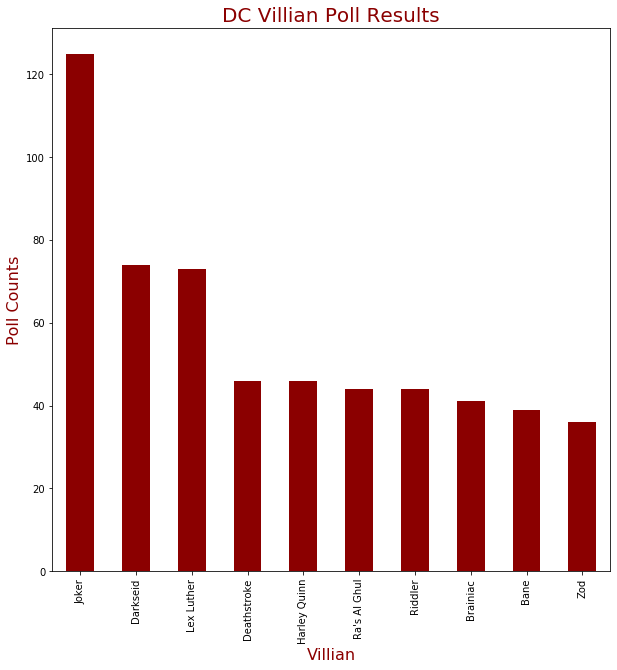

In [104]:
plt.figure(figsize=(10,10), edgecolor='darkred')
poll_top_10.plot(kind='bar', color='darkred',)
plt.title('DC Villian Poll Results', fontsize=20, color='darkred')
plt.xlabel('Villian', fontsize=16, color='darkred')
plt.ylabel('Poll Counts', fontsize=16, color='darkred')
plt.show()

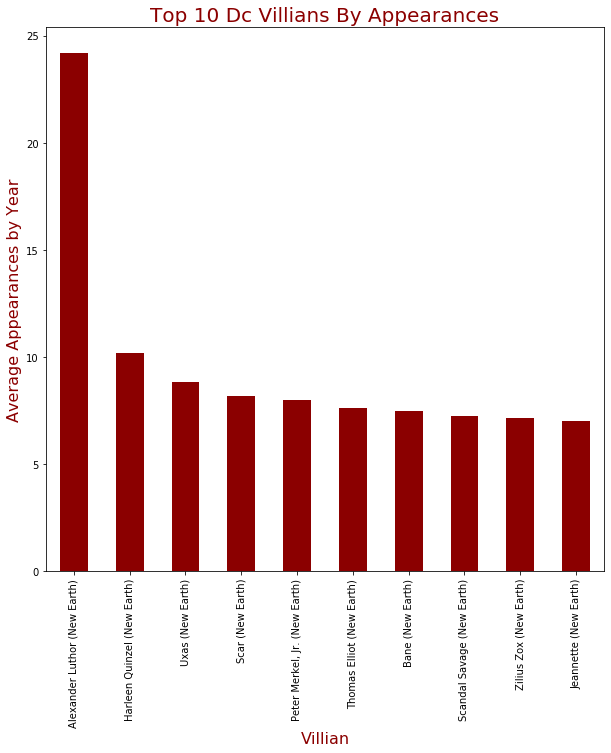

In [105]:
plt.figure(figsize=(10,10), edgecolor='darkred')
top_10_dc_villians.average_appearances_per_year.plot(kind='bar', color='darkred')
plt.title('Top 10 Dc Villians By Appearances', fontsize=20, color='darkred')
plt.xlabel('Villian', fontsize=16, color='darkred')
plt.ylabel('Average Appearances by Year', fontsize=16, color='darkred')
plt.show()